In [60]:
# Drew Lesh
# 11/17/25
# IBM Data Analyst Capstone Project - Data Visualization
# Stacked Charts

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [97]:
# load data
df = pd.read_csv('survey_data.csv')

df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


                    JobSatPoints_6  JobSatPoints_7
Age                                               
18-24 years old               15.0            20.0
25-34 years old               20.0            15.0
35-44 years old               20.0            15.0
45-54 years old               20.0            15.0
55-64 years old               20.0            20.0
65 years or older             20.0            15.0
Under 18 years old             1.5             5.0


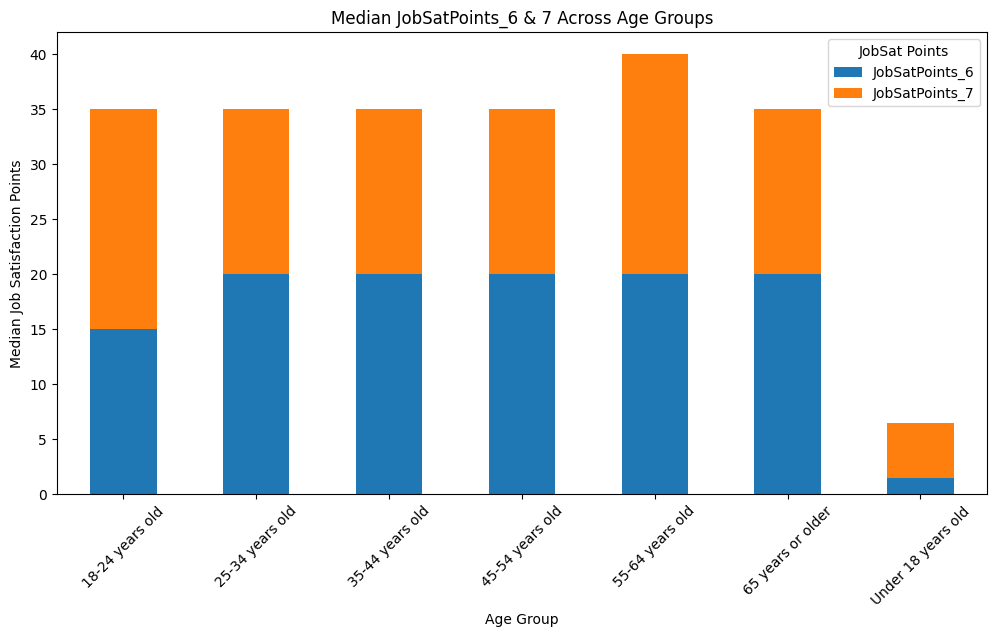

In [98]:
## Stacked Chart for Compostion of Job Satisfaction Across Age Groups
# 1. Stacked Chart of Median Job Satisfactions for Age Groups

df_1 = df[['JobSatPoints_6', 'JobSatPoints_7', 'Age']].dropna()
df_1 = df_1[df_1['Age'] != 'Prefer not to say']
median_points = df_1.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()
print(median_points)

median_points.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6)
)

plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points')
plt.title('Median JobSatPoints_6 & 7 Across Age Groups')
plt.xticks(rotation=45)
plt.legend(title='JobSat Points')
plt.show()

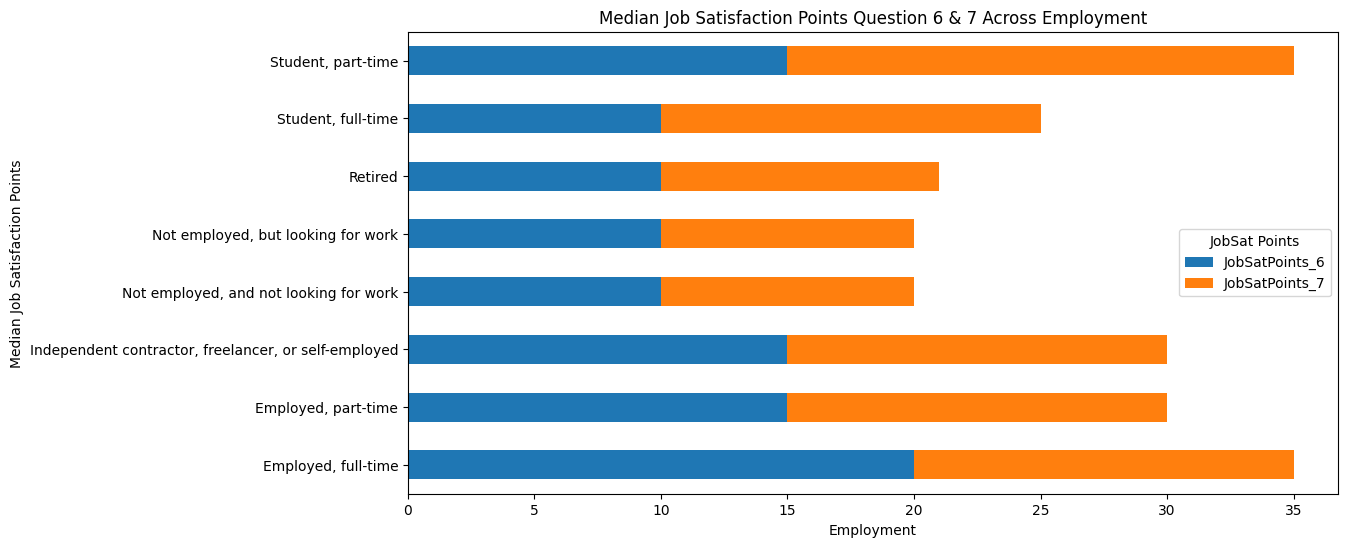

In [99]:
# 2. Stacked Chart of Job Satisfactions for Emploument Status

df_1_2 = df[['JobSatPoints_6', 'JobSatPoints_7', 'Employment']].dropna()
df_1_2['Employment'] = df_1_2['Employment'].str.split(';')
df_1_2 = df_1_2.explode('Employment')
median_points = df_1_2.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()
#print(median_points)

median_points.plot(
    kind='barh',
    stacked=True,
    figsize=(12,6)
)

plt.xlabel('Employment')
plt.ylabel('Median Job Satisfaction Points')
plt.title('Median Job Satisfaction Points Question 6 & 7 Across Employment')
plt.legend(title='JobSat Points')
plt.show()

JobSatPoints_6
0.0     3754
20.0    2507
10.0    1904
30.0    1553
15.0     872
        ... 
96.0       1
91.0       1
56.0       1
41.0       1
74.0       1
Name: count, Length: 83, dtype: int64


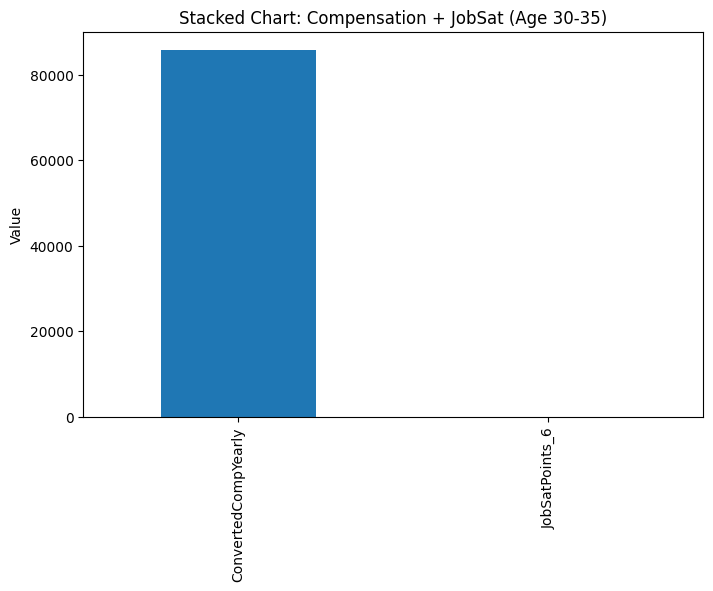

This doesn't really make sense because JobSatPoints_6 doesn't compare. There numbers are entirely different by the 10-100's of thousands.


In [100]:
## Stacked Chart for Compensation and Job Satisfaction by Age Group
#1. Stacked Chart for Compensation and Job Satisfaction for ages 30-35
df_2 = df[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()
print(df_2['JobSatPoints_6'].value_counts())
means = df_2[['ConvertedCompYearly', 'JobSatPoints_6']].mean()

means.plot(kind='bar', stacked=True, figsize=(8,5))
plt.ylabel('Value')
plt.title('Stacked Chart: Compensation + JobSat (Age 30-35)')
plt.show()
print("This doesn't really make sense because JobSatPoints_6 doesn't compare. There numbers are entirely different by the 10-100's of thousands.")

                    ConvertedCompYearly  JobSatPoints_6
Age                                                    
18-24 years old                 25735.0            20.0
25-34 years old                 59872.0            20.0
35-44 years old                 85925.0            20.0
45-54 years old                100900.5            20.0
55-64 years old                119189.5            20.0
65 years or older              121668.0            20.0
Under 18 years old               8661.0            10.0


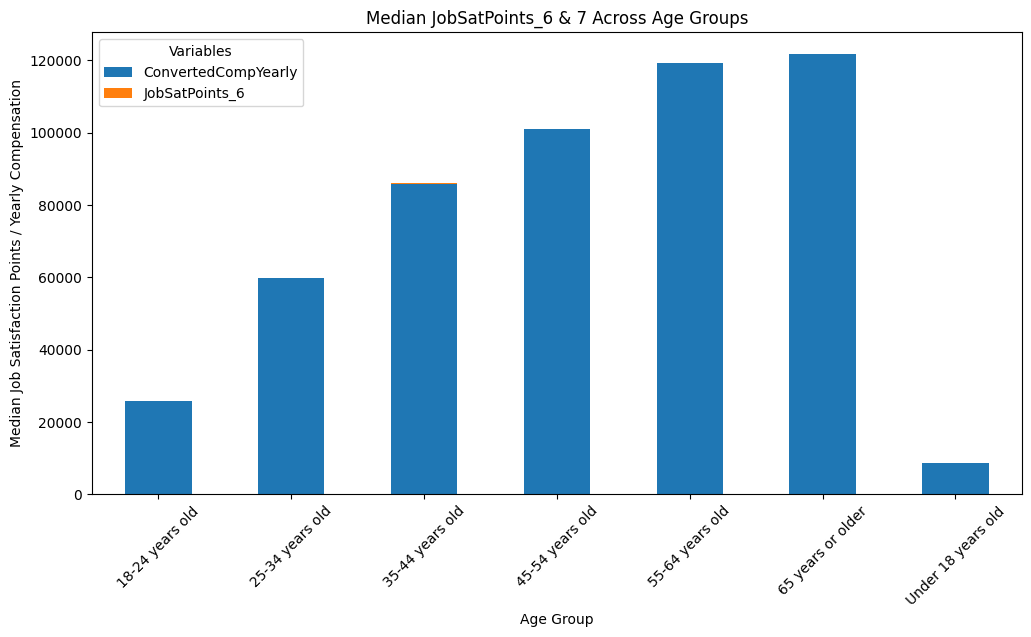

This doesn't really make sense because JobSatPoints_6 doesn't compare. There numbers are entirely different by the 10-100's of thousands.


In [101]:
# 2. Stacked Chart of Median Compensation and Job Satisfaction Across Age Groups

df_2_2 = df[['Age', 'ConvertedCompYearly', 'JobSatPoints_6']].dropna()
df_2_2 = df_2_2[df_2_2['Age'] != 'Prefer not to say']
medians_2_2 = df_2_2.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median()
print(medians_2_2)

medians_2_2.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6)
)
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points / Yearly Compensation')
plt.title('Median JobSatPoints_6 & 7 Across Age Groups')
plt.xticks(rotation=45)
plt.legend(title='Variables')
plt.show()
print("This doesn't really make sense because JobSatPoints_6 doesn't compare. There numbers are entirely different by the 10-100's of thousands.")

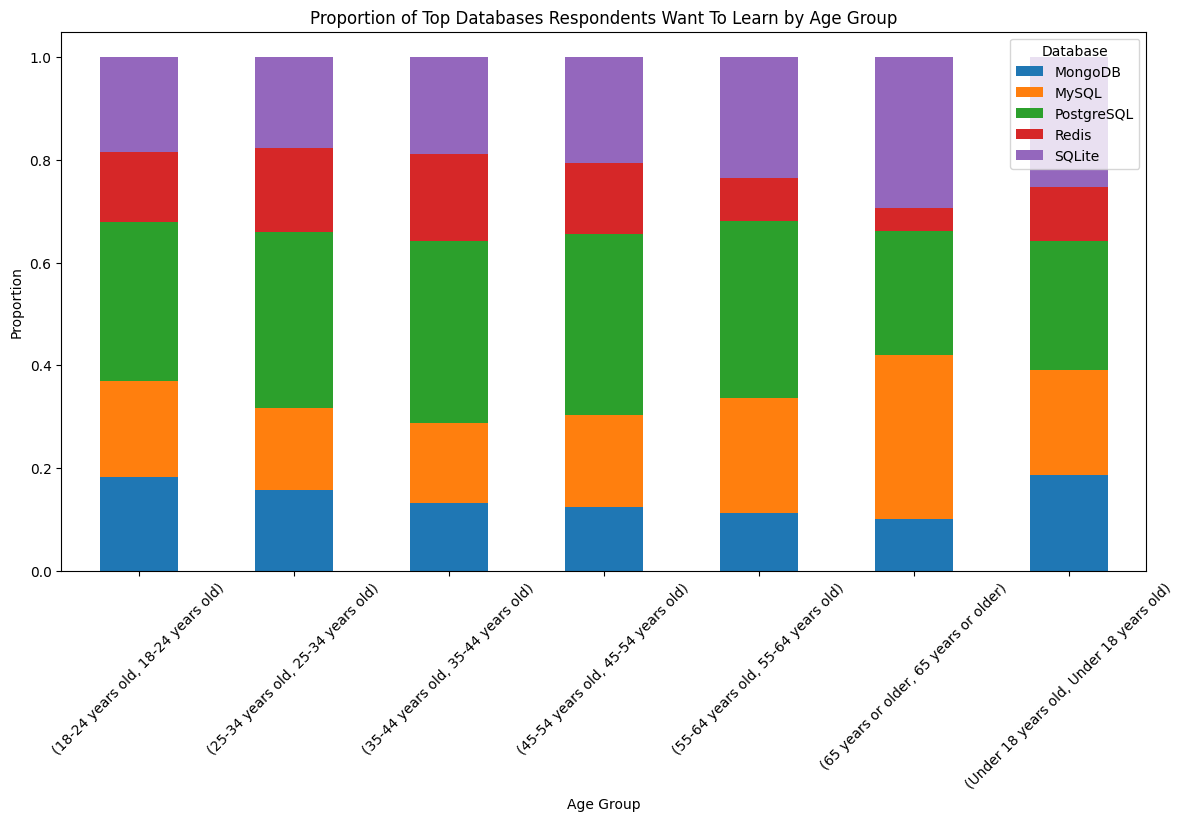

In [102]:
## Comparing Data using Stacked Charts
# 1. Stacked Chart of Preferred Databases by Age Group

# Get data
df_3 = df[['Age', 'DatabaseWantToWorkWith']].dropna()

# Remove age group 'prefer not to say'
df_3 = df_3[df_3['Age'] != 'Prefer not to say']

# Split and explode data
df_3['DatabaseWantToWorkWith'] = df_3['DatabaseWantToWorkWith'].str.split(';')
df_3 = df_3.explode('DatabaseWantToWorkWith')

# Get the top databases
top_dbs = (df_3['DatabaseWantToWorkWith'].value_counts().head(5).index)
df_3 = df_3[df_3['DatabaseWantToWorkWith'].isin(top_dbs)]


# Compute proportions for each age group
proportions = (
    df_3.groupby(['Age', 'DatabaseWantToWorkWith'])
        .size()
        .groupby(level=0)
        .apply(lambda x: x / x.sum())
        .unstack(fill_value=0)
)

# Plot stacked chart
proportions.plot(
    kind='bar',
    stacked=True,
    figsize=(14,7)
)
plt.title('Proportion of Top Databases Respondents Want To Learn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Database')
plt.show()

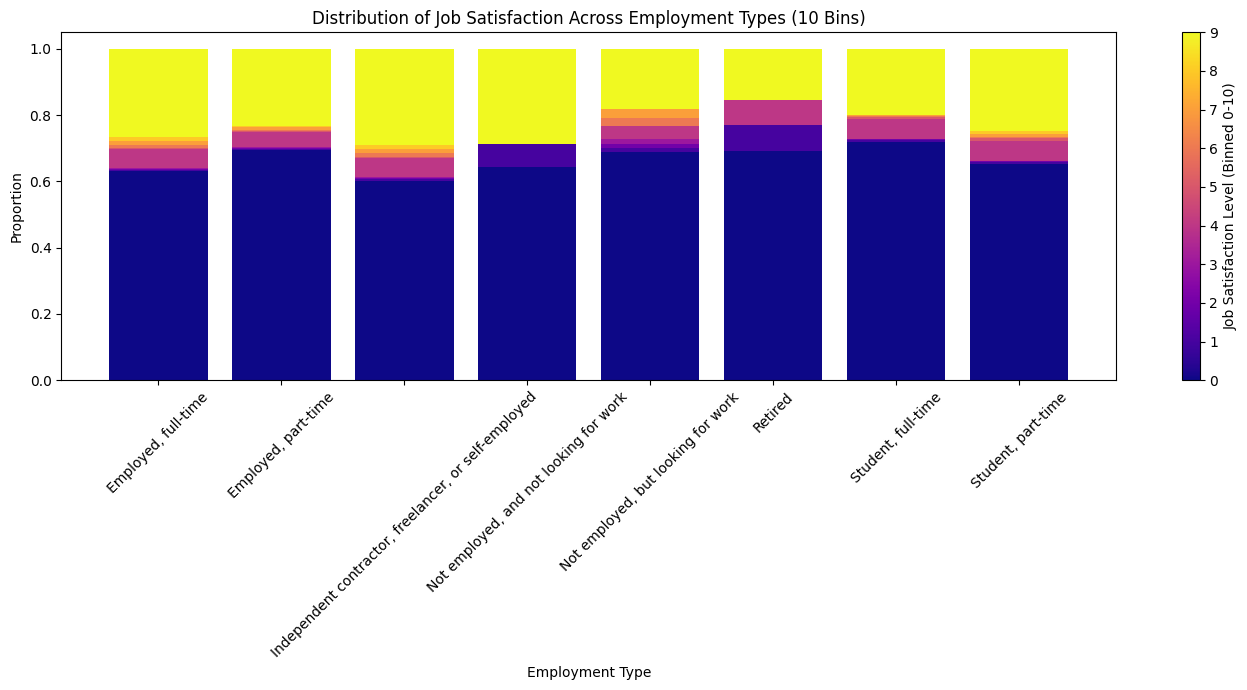

In [106]:
# 2. Stacked Chart of Employment Type by Job Satisfaction

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Explode Employment
df_3_2 = df[['JobSatPoints_6', 'Employment']].dropna()
df_3_2['Employment'] = df_3_2['Employment'].str.split(';')
df_3_2 = df_3_2.explode('Employment')

# Filter top 10 Employment types
top_emp = df_3_2['Employment'].value_counts().head(10).index
df_3_2 = df_3_2[df_3_2['Employment'].isin(top_emp)]

# Bin JobSatPoints into 10 bins
df_3_2['JobSatBin'] = pd.cut(
    df_3_2['JobSatPoints_6'],
    bins=np.linspace(0, 10, 11),
    labels=[f'{i}' for i in range(10)],
    include_lowest=True
)

# Crosstab: Employment x JobSatBin (proportion)
pivot = pd.crosstab(df_3_2['Employment'], df_3_2['JobSatBin'], normalize='index')

# Plot
fig, ax = plt.subplots(figsize=(14,7))
bottoms = np.zeros(len(pivot))

cmap = plt.cm.plasma  # Changed colormap
norm = plt.Normalize(0, 9)

for val in pivot.columns.astype(int):
    color = cmap(norm(val))
    ax.bar(pivot.index, pivot[str(val)], bottom=bottoms, color=color)
    bottoms += pivot[str(val)]

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Job Satisfaction Level (Binned 0-10)')

plt.xlabel('Employment Type')
plt.ylabel('Proportion')
plt.title('Distribution of Job Satisfaction Across Employment Types (10 Bins)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



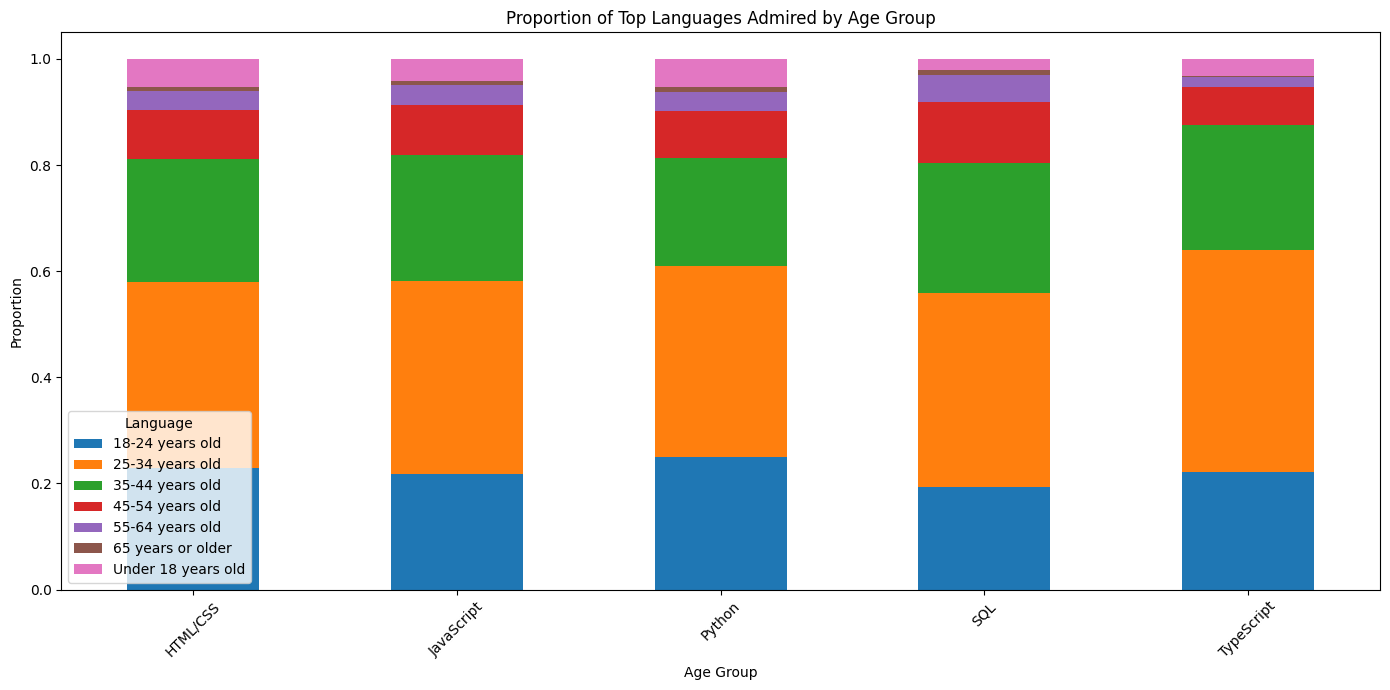

In [109]:
## Exploring Technology Preferences Using Stacked Charts
#  1. Stacked Chart for Preferred Programming Languages by Age Group

# Get data
df_4 = df[['LanguageAdmired', 'Age']].dropna()

# Remove age group 'prefer not to say'
df_4 = df_4[df_4['Age'] != 'Prefer not to say']

df_4['LanguageAdmired'] = df_4['LanguageAdmired'].str.split(';')
df_4 = df_4.explode('LanguageAdmired')

top_langs = df_4['LanguageAdmired'].value_counts().head(5).index

df_4 = df_4[df_4['LanguageAdmired'].isin(top_langs)]

proportions = pd.crosstab(
    df_4['LanguageAdmired'],
    df_4['Age'],
    normalize='index'
)

proportions.plot(
    kind='bar',
    stacked=True,
    figsize=(14,7)
)
plt.title('Proportion of Top Languages Admired by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Language')
plt.tight_layout()
plt.show()

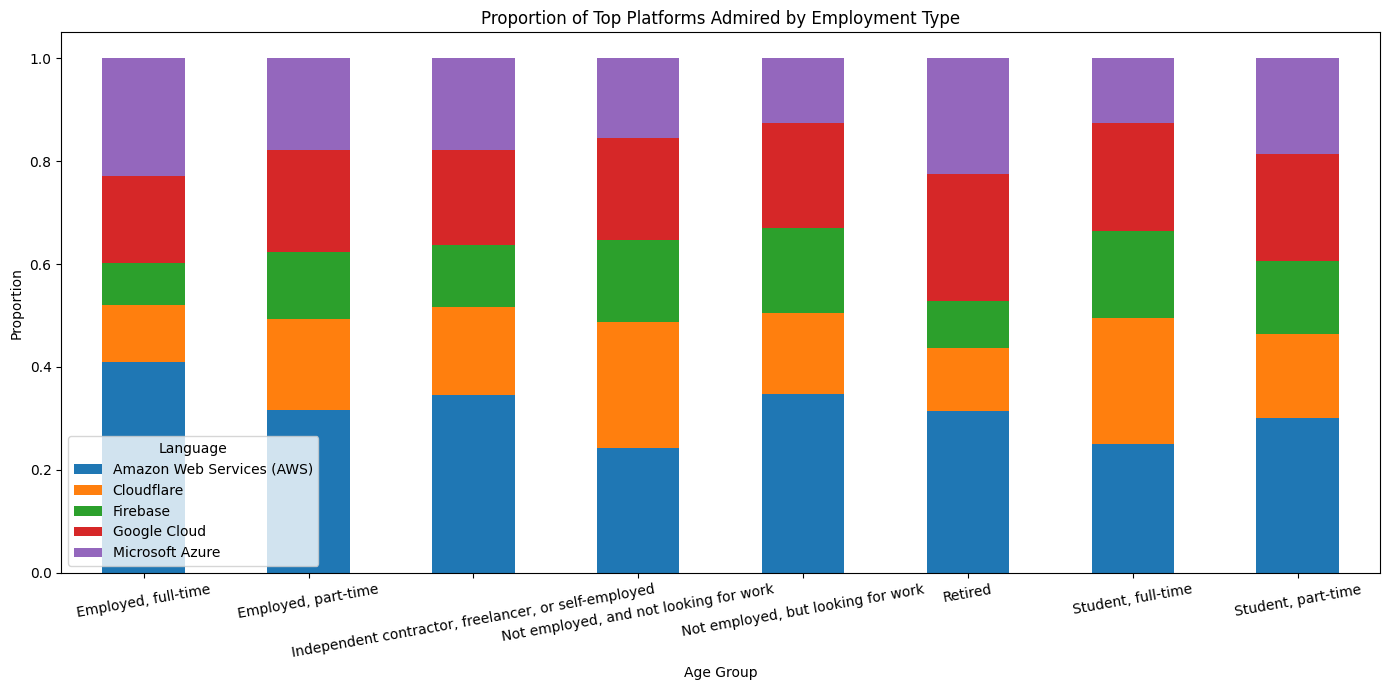

In [110]:
# 2. Stacked Chart for Technology Adoption by Employment Type

df_4_2 = df[['PlatformAdmired', 'Employment']].dropna()
df_4_2 = df_4_2[df_4_2['Employment'] != 'I prefer not to say']
df_4_2['PlatformAdmired'] = df_4_2['PlatformAdmired'].str.split(';')
df_4_2['Employment'] = df_4_2['Employment'].str.split(';')

df_4_2 = df_4_2.explode('PlatformAdmired')
df_4_2 = df_4_2.explode('Employment')

top_platforms = df_4_2['PlatformAdmired'].value_counts().head(5).index
df_4_2 = df_4_2[df_4_2['PlatformAdmired'].isin(top_platforms)]

proportions = pd.crosstab(
    df_4_2['Employment'],
    df_4_2['PlatformAdmired'],
    normalize='index'
)

proportions.plot(
    kind='bar',
    stacked=True,
    figsize=(14,7)
)
plt.title('Proportion of Top Platforms Admired by Employment Type')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=10)
plt.legend(title='Language')
plt.tight_layout()
plt.show()